In [ ]:
!pip install seabird

In [ ]:
from seabird.cnv import fCNV
import numpy.ma as ma
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
profile1 = fCNV('MIR_121023_ST1.cnv')
profile2 = fCNV('MIR_121023_ST2.cnv')
profile3 = fCNV('MIR_121023_ST3.cnv')

In [ ]:
profile1.attributes  # It will return the header, as a dictionary.

{'sbe_model': '9',
 'LATITUDE': 43.035,
 'LONGITUDE': 6.003333333333333,
 'gps_datetime': 'Oct 12 2023  08:26:20',
 'seasave': 'V 7.26.7.121',
 'instrument_type': 'CTD',
 'nquan': '9',
 'nvalues': '17196',
 'start_time': 'Oct 12 2023 08:30:00 [NMEA time, first data scan]',
 'bad_flag': '-9.990e-29',
 'file_type': 'ascii',
 'md5': '7432fbe04a0cb43e117782dccca73637',
 'datetime': datetime.datetime(2023, 10, 12, 8, 30),
 'filename': 'MIR_121023_ST1.cnv'}

In [ ]:
profile1.keys()

['PRES', 'TEMP', 'CNDC', 'sbox0Mm/Kg', 'par', 'flSP', 'PSAL', 'DEPTH', 'flag']

In [ ]:
profile1['flag']

masked_array(data=[0., 0., 0., ..., 0., 0., 0.],
             mask=False,
       fill_value=-9.99e-29)

In [ ]:
max_index1 = np.argmax(ma.getdata(profile1['DEPTH']))
max_index2 = np.argmax(ma.getdata(profile2['DEPTH']))
max_index3 = np.argmax(ma.getdata(profile3['DEPTH']))

In [ ]:
df = pd.DataFrame()
for i in profile1.keys():
  df[i] = ma.getdata(profile1[i])

In [ ]:
df

,PRES,TEMP,CNDC,sbox0Mm/Kg,par,flSP,PSAL,DEPTH,flag
0,1.830,21.8590,5.400264,208.992,549.51,0.025641,38.3273,1.815,0.0
1,1.830,21.8594,5.400233,208.992,581.29,0.009768,38.3267,1.815,0.0
2,1.830,21.8594,5.400225,208.992,594.52,0.002442,38.3267,1.815,0.0
3,1.830,21.8598,5.400256,208.990,596.19,0.014652,38.3266,1.815,0.0
4,1.768,21.8598,5.400264,208.989,604.63,0.035409,38.3267,1.754,0.0
...,...,...,...,...,...,...,...,...,...
17191,5.790,21.8560,5.400266,209.826,379.12,0.026862,38.3285,5.744,0.0
17192,5.775,21.8562,5.400235,209.834,378.06,0.031746,38.3281,5.729,0.0
17193,5.713,21.8564,5.400250,209.840,372.78,0.031746,38.3281,5.668,0.0
17194,5.660,21.8565,5.400266,209.846,370.69,0.047619,38.3281,5.615,0.0


In [ ]:
df.isnull().values.any()

False

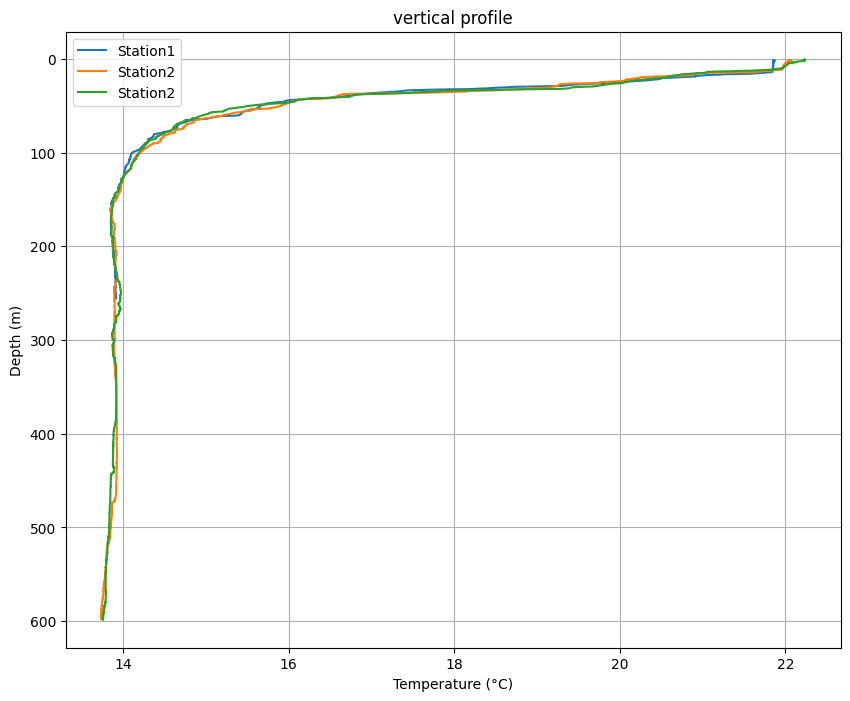

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(ma.getdata(profile1['TEMP'])[:max_index1+1], ma.getdata(profile1['DEPTH'])[:max_index1+1], label = 'Station1')
plt.plot(ma.getdata(profile2['TEMP'])[:max_index2+1], ma.getdata(profile2['DEPTH'])[:max_index2+1], label = 'Station2')
plt.plot(ma.getdata(profile3['TEMP'])[:max_index3+1], ma.getdata(profile3['DEPTH'])[:max_index3+1], label = 'Station2')
# plt.plot(ma.getdata(profile['PSAL']), ma.getdata(profile['PRES']), label = 'sal') # Negative z for depth representation
plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (m)')
plt.title('vertical profile')
plt.gca().invert_yaxis() # Invert y-axis to show depth correctly
plt.grid(True)
plt.legend()
plt.show()

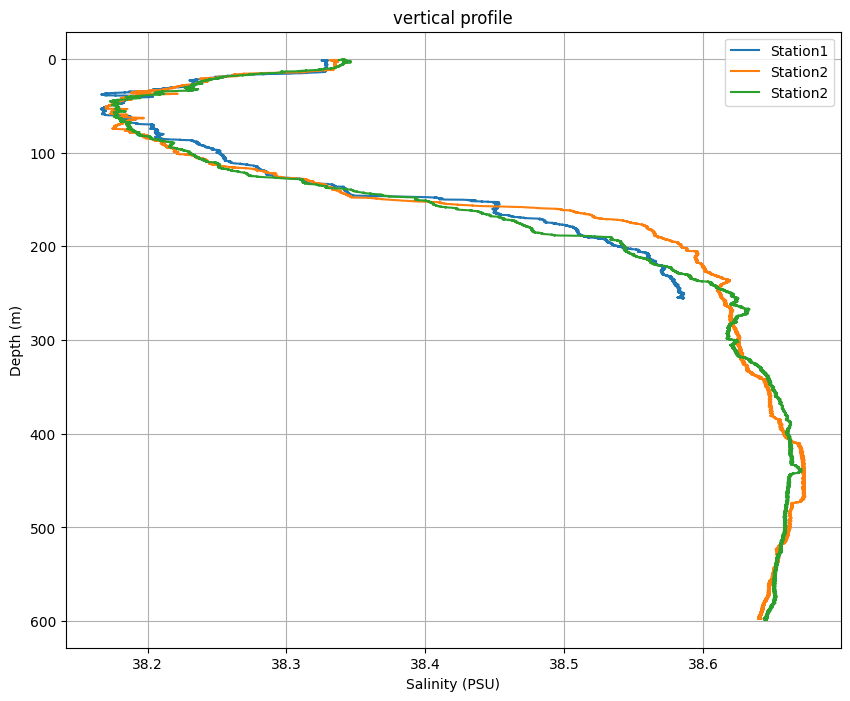

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(ma.getdata(profile1['PSAL'])[:max_index1+1], ma.getdata(profile1['DEPTH'])[:max_index1+1], label = 'Station1')
plt.plot(ma.getdata(profile2['PSAL'])[:max_index2+1], ma.getdata(profile2['DEPTH'])[:max_index2+1], label = 'Station2')
plt.plot(ma.getdata(profile3['PSAL'])[:max_index3+1], ma.getdata(profile3['DEPTH'])[:max_index3+1], label = 'Station2')
# plt.plot(ma.getdata(profile['PSAL']), ma.getdata(profile['PRES']), label = 'sal') # Negative z for depth representation
plt.xlabel('Salinity (PSU)')
plt.ylabel('Depth (m)')
plt.title('vertical profile')
plt.gca().invert_yaxis() # Invert y-axis to show depth correctly
plt.grid(True)
plt.legend()
plt.show()

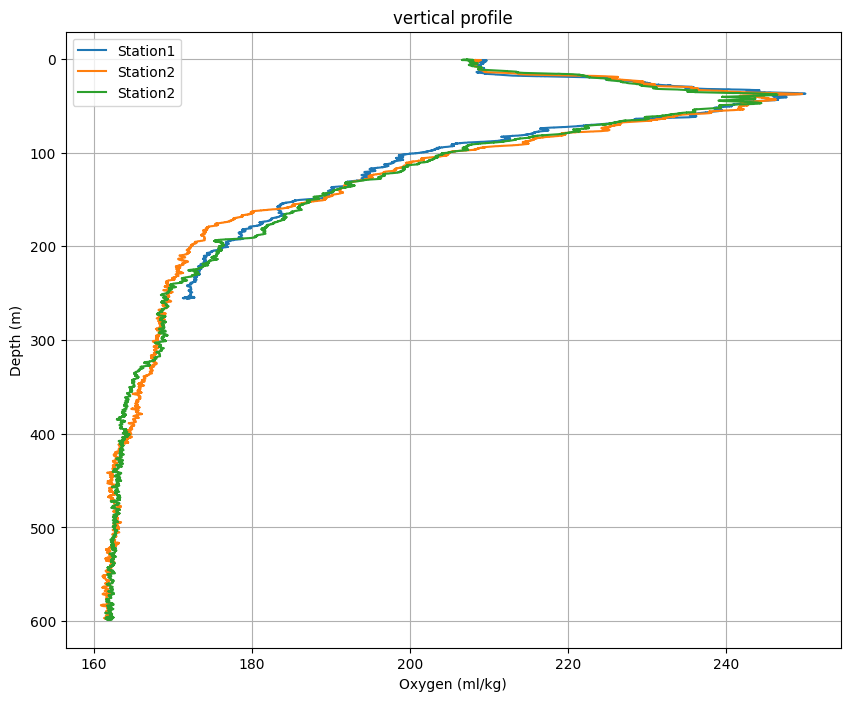

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(ma.getdata(profile1['sbox0Mm/Kg'])[:max_index1+1], ma.getdata(profile1['DEPTH'])[:max_index1+1], label = 'Station1')
plt.plot(ma.getdata(profile2['sbox0Mm/Kg'])[:max_index2+1], ma.getdata(profile2['DEPTH'])[:max_index2+1], label = 'Station2')
plt.plot(ma.getdata(profile3['sbox0Mm/Kg'])[:max_index3+1], ma.getdata(profile3['DEPTH'])[:max_index3+1], label = 'Station2')
# plt.plot(ma.getdata(profile['PSAL']), ma.getdata(profile['PRES']), label = 'sal') # Negative z for depth representation
plt.xlabel('Oxygen (ml/kg)')
plt.ylabel('Depth (m)')
plt.title('vertical profile')
plt.gca().invert_yaxis() # Invert y-axis to show depth correctly
plt.grid(True)
plt.legend()
plt.show()

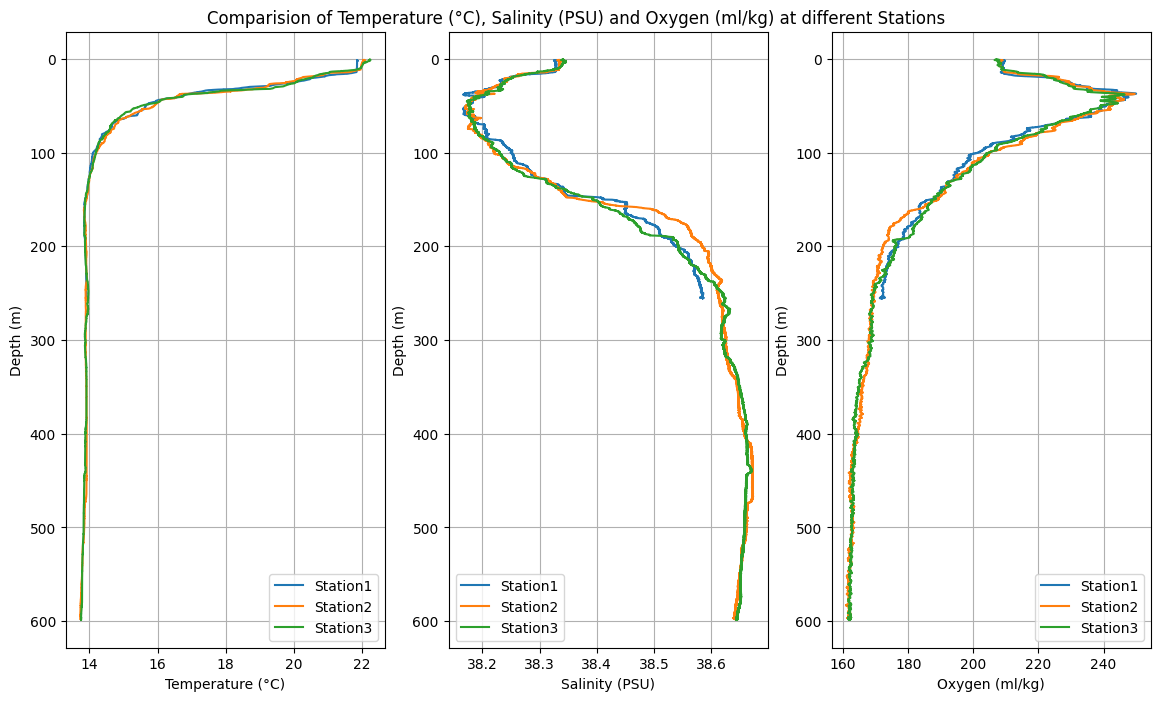

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(14,8))

ax[0].set_xlabel('Temperature (°C)')
ax[0].set_ylabel('Depth (m)')
ax[0].plot(ma.getdata(profile1['TEMP'])[:max_index1+1], ma.getdata(profile1['DEPTH'])[:max_index1+1], label = 'Station1')
ax[0].plot(ma.getdata(profile2['TEMP'])[:max_index2+1], ma.getdata(profile2['DEPTH'])[:max_index2+1], label = 'Station2')
ax[0].plot(ma.getdata(profile3['TEMP'])[:max_index3+1], ma.getdata(profile3['DEPTH'])[:max_index3+1], label = 'Station3')
ax[0].tick_params(axis='x')
ax[0].invert_yaxis()
ax[0].grid(True)
ax[0].legend(loc = 'lower right')

ax[1].set_xlabel('Salinity (PSU)')
ax[1].set_ylabel('Depth (m)')
ax[1].plot(ma.getdata(profile1['PSAL'])[:max_index1+1], ma.getdata(profile1['DEPTH'])[:max_index1+1], label = 'Station1')
ax[1].plot(ma.getdata(profile2['PSAL'])[:max_index2+1], ma.getdata(profile2['DEPTH'])[:max_index2+1], label = 'Station2')
ax[1].plot(ma.getdata(profile3['PSAL'])[:max_index3+1], ma.getdata(profile3['DEPTH'])[:max_index3+1], label = 'Station3')
ax[1].tick_params(axis='x')
ax[1].invert_yaxis()
ax[1].grid(True)
ax[1].legend(loc = 'lower left')


ax[2].set_xlabel('Oxygen (ml/kg)')
ax[2].set_ylabel('Depth (m)')
ax[2].plot(ma.getdata(profile1['sbox0Mm/Kg'])[:max_index1+1], ma.getdata(profile1['DEPTH'])[:max_index1+1], label = 'Station1')
ax[2].plot(ma.getdata(profile2['sbox0Mm/Kg'])[:max_index2+1], ma.getdata(profile2['DEPTH'])[:max_index2+1], label = 'Station2')
ax[2].plot(ma.getdata(profile3['sbox0Mm/Kg'])[:max_index3+1], ma.getdata(profile3['DEPTH'])[:max_index3+1], label = 'Station3')
ax[2].tick_params(axis='x')
ax[2].invert_yaxis()
ax[2].grid(True)
ax[2].legend(loc = 'lower right')

plt.title('Comparision of Temperature (°C), Salinity (PSU) and Oxygen (ml/kg) at different Stations', x=-0.8)
plt.show()

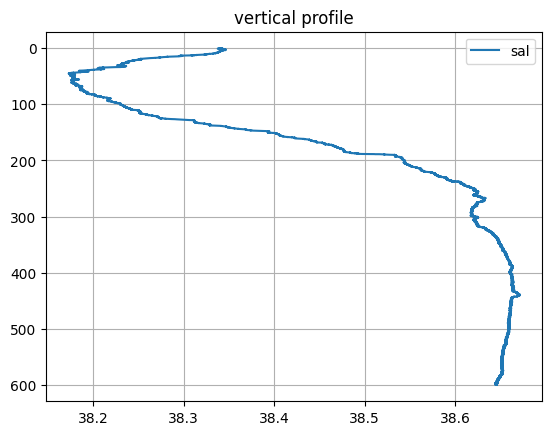

In [ ]:
plt.figure()
plt.plot(ma.getdata(profile['PSAL'])[:max_index+1], ma.getdata(profile['DEPTH'])[:max_index+1], label = 'sal') # Negative z for depth representation
# plt.xlabel('Horizontal Position (x)')
# plt.ylabel('Vertical Position (z)')
plt.title('vertical profile')
plt.gca().invert_yaxis() # Invert y-axis to show depth correctly
plt.grid(True)
plt.legend()
plt.show()

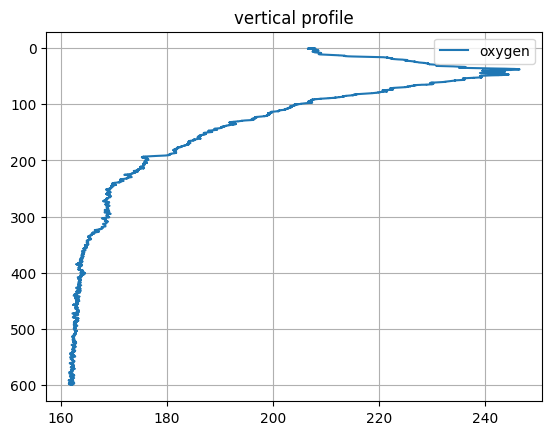

In [ ]:
plt.figure()
plt.plot(ma.getdata(profile['sbox0Mm/Kg'])[:max_index+1], ma.getdata(profile['DEPTH'])[:max_index+1], label = 'oxygen') # Negative z for depth representation
# plt.xlabel('Horizontal Position (x)')
# plt.ylabel('Vertical Position (z)')
plt.title('vertical profile')
plt.gca().invert_yaxis() # Invert y-axis to show depth correctly
plt.grid(True)
plt.legend()
plt.show()

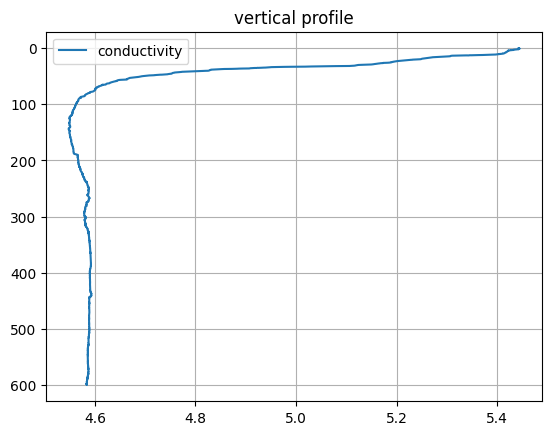

In [ ]:
plt.figure()
plt.plot(ma.getdata(profile['CNDC'])[:max_index+1], ma.getdata(profile['DEPTH'])[:max_index+1], label = 'conductivity') # Negative z for depth representation
# plt.xlabel('Horizontal Position (x)')
# plt.ylabel('Vertical Position (z)')
plt.title('vertical profile')
plt.gca().invert_yaxis() # Invert y-axis to show depth correctly
plt.grid(True)
plt.legend()
plt.show()

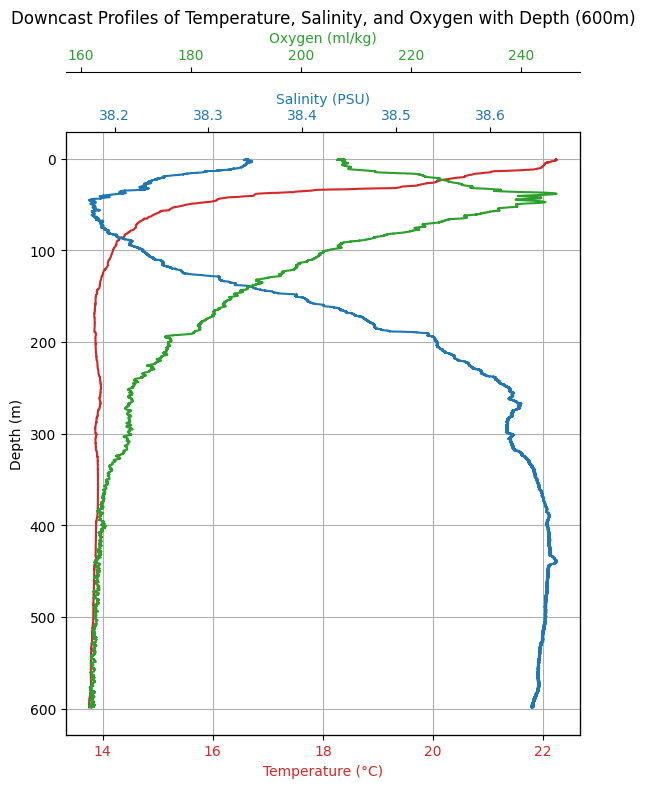

In [ ]:
fig, ax1 = plt.subplots(figsize=(6,8))

color = 'tab:red'
ax1.set_xlabel('Temperature (°C)', color=color)
ax1.set_ylabel('Depth (m)')
ax1.plot(ma.getdata(profile['TEMP'])[:max_index+1], ma.getdata(profile['DEPTH'])[:max_index+1], color=color)
ax1.tick_params(axis='x', labelcolor=color)
ax1.invert_yaxis()
ax1.grid(True)

ax2 = ax1.twiny()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_xlabel('Salinity (PSU)', color=color)  # we already handled the x-label with ax1
ax2.plot(ma.getdata(profile['PSAL'])[:max_index+1], ma.getdata(profile['DEPTH'])[:max_index+1], color=color)
ax2.tick_params(axis='x', labelcolor=color)

ax3 = ax1.twiny()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax3.set_xlabel('Oxygen (ml/kg)', color=color)  # we already handled the x-label with ax1
ax3.plot(ma.getdata(profile['sbox0Mm/Kg'])[:max_index+1], ma.getdata(profile['DEPTH'])[:max_index+1], color=color)
ax3.tick_params(axis='x', labelcolor=color)
ax3.spines['top'].set_position(('axes', 1.1))  # Adjust the position of this axis

plt.title('Downcast Profiles of Temperature, Salinity, and Oxygen with Depth (600m)')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

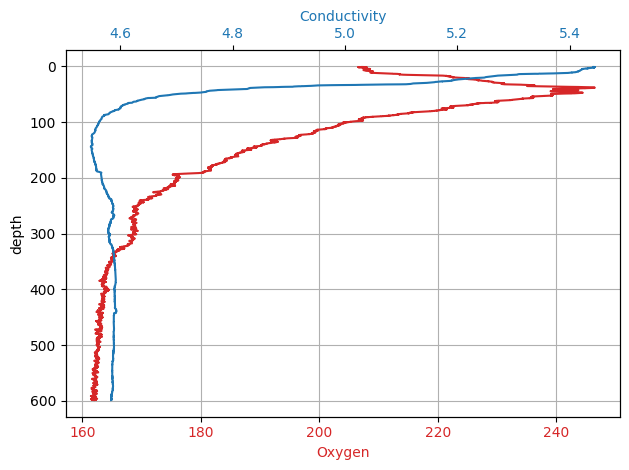

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Oxygen', color=color)
ax1.set_ylabel('depth')
ax1.plot(ma.getdata(profile['sbox0Mm/Kg'])[:max_index+1], ma.getdata(profile['DEPTH'])[:max_index+1], color=color)
ax1.tick_params(axis='x', labelcolor=color)
ax1.invert_yaxis()
ax1.grid(True)
ax2 = ax1.twiny()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_xlabel('Conductivity', color=color)  # we already handled the x-label with ax1
ax2.plot(ma.getdata(profile['CNDC'])[:max_index+1], ma.getdata(profile['DEPTH'])[:max_index+1], color=color)
ax2.tick_params(axis='x', labelcolor=color)



fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

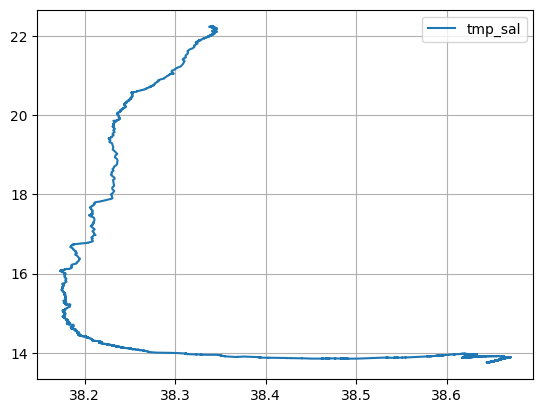

In [ ]:
plt.figure()
plt.plot(ma.getdata(profile['PSAL'])[:max_index+1], ma.getdata(profile['TEMP'])[:max_index+1], label = 'tmp_sal') # Negative z for depth representation
# plt.xlabel('Horizontal Position (x)')
# plt.ylabel('Vertical Position (z)')
# plt.title('vertical profile')
# plt.gca().invert_yaxis() # Invert y-axis to show depth correctly
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# df.to_csv('ctd3_new.csv', index=False)